In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
matplotlib.rcParams['font.size'] = 12

# Analysis of COVID-19 death trends

In [3]:
from jhu_data import DEATHS_CSV, DataSeries

In [4]:
global_df = pd.read_csv(DEATHS_CSV)

In [5]:
data_usa = DataSeries(global_df, "US")
data_france = DataSeries(global_df, "France")
data_china = DataSeries(global_df, "China")
data_italy = DataSeries(global_df, "Italy")
data_india = DataSeries(global_df, "India")

In [6]:
cutoff = 10
xmax = 30

first_ten = slice(0, 10)
last_ten = slice(-10, None)

def plot_country(data, color, label, slicing):
    plt.plot(data.data(cutoff=cutoff).values, color=color, label=label)
    plt.plot(data.fit(cutoff=cutoff, slicing=slicing).extrapolate(0, xmax+1),
             color=color, linestyle='--')
    
def std_plot(cutoff, xmax):
    plt.legend(loc='lower right')
    plt.yscale('log')
    plt.xlabel("Days since {}th death".format(cutoff))
    plt.ylabel("Total deaths")
    plt.xlim(0, xmax)
    plt.ylim(None, 1e4);     

A few notes about this analysis. First, I'm going to look at deaths, not number of confirmed cases. Often there's a focus on confirmed cases because it is a leading indicator, whereas deaths are a trailing indicator (in less technical terms, people get sick before they die). However, I think that differences in testing approaches and in the availability of tests makes it hard to compare confirmed cases in different localities. Barring explicit cover-up or massive lack of testing, deaths will usually be reported correctly. Also, I'm frankly more concerned about the number of deaths. If this thing infected 70% of the planet but didn't kill anyone, we wouldn't be worried about it. Finally, observing the number of deaths could give more information about the breakdown of health services, which wouldn't be apparent from the number of confirmed cases. In order to compare different localities and standardize between different outbreaks, I'll
look at the number of deaths in terms of days after the 10th death.

Before we begin, let me remind you that this isn't just statistics. We're talking about the deaths of grandparents, parents, husbands, wives, children. Every one of these is a tragedy. So far, Italy has suffered over 7500 such tragedies, China over 3200, and the world over 21000. We make statistics out of these tragedies so we can learn something; so that from those tragedies we can extract information to prevent future tragedies. But never forget that this information comes at a great cost.

Now, to get technical, I'll be plotting these on what are called "semi-log" plots. That means that one axis (the y-axis) is on a log scale. The semi-log plot turns exponential behavior into a straight line. Since we expect an outbreak to be exponential, plotting on a semi-log plot means that any time the data deviates from a straight line, there may be something to interpret.

I'll start out with some data from China, just in order to show how to interpret these plots.

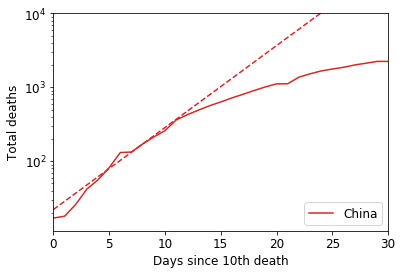

In [7]:
plot_country(data_china, color='C3', label="China",  slicing=first_ten)
std_plot(cutoff, xmax)
plt.savefig("china_first10.svg")

If an outbreak is behaving exactly exponentially, then we would expect it to fit a straight line on these plots. However, if we're successfully containing the outbreak, then the solid curve (the actual data) will fall below the line. As an example, here's the data for China. In the first plot, I create a line based on the first 10 days after the 10th death. You can see that by day 15, the actual number of deaths has falling significantly below the dashed line. That means things were getting better -- and they continued to get better.

The same is true if I draw the line elsewhere. In the second figure, I draw a line based on the period 10-20 days after the 10th death. You can see that the curve was steeper before that time (meaning that, in the past, things were worse) and more shallow after (meaning that the situation was improving). This is what we want to see.

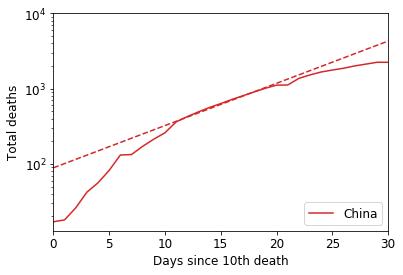

In [8]:
plot_country(data_china, color='C3', label='China', slicing=slice(10,20))
std_plot(cutoff, xmax)
plt.savefig("china_next10.svg")

So let's look at some data for ongoing outbreaks. I'll look at Italy, France, and the US.

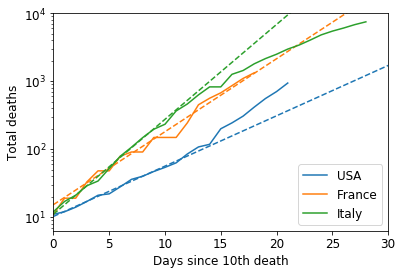

In [9]:
plot_country(data_usa, color='C0', label="USA", slicing=first_ten)
plot_country(data_france, color='C1', label="France", slicing=first_ten)
plot_country(data_italy, color='C2', label="Italy", slicing=first_ten)
std_plot(cutoff, xmax)
plt.savefig("first10.svg")

Here, I compare the extrapolations based on the first 10 days after the 10th death. Each country has a slightly different slope. Italy's is the steepest; I assume that's because the Lombardy region was horribly overwhelmed at the beginning of its outbreak, and so people were dying there very quickly. The US has a much more shallow slope; I'm not entirely sure, but I suspect this is because some of the first US deaths were before there was sustained transmission in the US. France's line is in between, and has about the same slope as China's first 10 days.

Note that Italy's death toll is decreasing relative to the prediction for the first 10 days. This is a good sign: Italy may be on the way to getting under control. France seems to still be following the exponential growth nearly exactly. At just over one week into the confinement, it may be too early to see much improvement when looking at the number of deaths (a trailing indicator).

The curve for the USA is concerning. Remember, the solid curve under the dashed line is a good sign. So the solid curve over the dashed line is a bad sign. Something has changed in the US that is causing people to die more quickly than they originally had. I suspect this is that the outbreak has really taken hold, and will be spreading rapidly now.

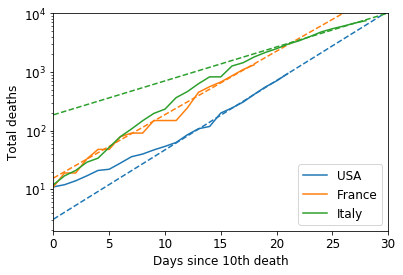

In [10]:
plot_country(data_usa, color='C0', label="USA", slicing=last_ten)
plot_country(data_france, color='C1', label="France", slicing=last_ten)
plot_country(data_italy, color='C2', label="Italy", slicing=last_ten)
std_plot(cutoff, xmax)
plt.savefig("last10.svg")

We can also fit to the most recent 10 days, instead of the first 10 days, and compare that. Here, France stays about the same, but it really emphasizes how much better Italy is doing. Note that France and the US have about about the same slope; things are getting worse in both countries at the same pace.

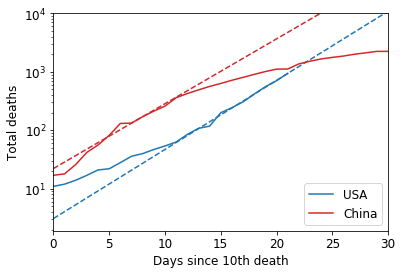

In [11]:
plot_country(data_usa, color='C0', label="USA", slicing=last_ten)
plot_country(data_china, color='C3', label="China",  slicing=first_ten)
std_plot(cutoff, xmax)
plt.savefig("us_china.svg")

Finally, I wanted to compare the most recent 10 days in the US to the first 10 after 10 deaths in China. Until recently, the US seemed to be doing better than China. But now the slope of the extrapolation for the US is as bad as the beginning of the outbreak was in China. And China put down immediate measures to flatten the curve, whereas the US outbreak is getting worse.

NOTE: All data is from the Johns Hopkins live updating dataset, available [here](https://github.com/CSSEGISandData/COVID-19).